# Modelowanie szeregów  czasowych  z autokorelacją

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#from ts_utils import check_time_series_stationary
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [3]:
from statsmodels.tsa.stattools import adfuller
def check_time_series_stationary(y, rolling_len = 12):
    
    y = pd.Series(y)
    
    df_test = adfuller(y)
    
    if df_test[1] < 0.05:
        print('Szereg jest stacjonarny')
    else:
        print('Szereg jest niestacjonarny')
    
    print("{0:^32s}".format("Dickey-Fuller Test"))
    print("-"*32+"\n")
    
    print("{0:<20s}: {1:>10.4f}".format('Test Statistic', df_test[0]))
    print("{0:<20s}: {1:>10.4f}".format('p-value', df_test[1]))
    print("-"*32+"\n")
    
    rolling_mean = y.rolling(rolling_len).mean()
    rolling_var = y.rolling(rolling_len).var()

    plt.plot(y)
    plt.plot(rolling_mean, label="Rolling mean")
    plt.plot(rolling_var, label="Rolling var")
    plt.legend()
    plt.show()
    
    print("{0:^32s}".format("Autocorrelation plot"))
    print("-"*32+"\n")
    pd.plotting.autocorrelation_plot(y)
    plt.show()

## Graficzna analiza przebiegu funkcji ACF i PACF

- jeśli autokorelacja próbkowa $\text{ACF}(h)$ znajduje się pomiędzy przedziałami ufności $\pm 1,96 \sqrt{n}$ dla $h > q$, to spodziewamy się, że dane są realizacją procesu $\text{MA}(q)$;
- jeśli cząstkowa autokorelacja próbkowa $\text{PACF}(h)$ znajduje się pomiędzy przedziałami ufności $\pm 1,96 \sqrt{n}$ dla $h > p$, to spodziewamy się, że dane są realizacją procesu $\text{AR}(p)$;

## Model średniej ruchomej - $\text{MA}(q)$

**Modelem średniej ruchomej rzędu $q$** nazywamy stacjonarny szereg $Y_t$ spełniający równanie:
$$Y_t = \varepsilon_t + \sum_{i=1}^q \theta_i\cdot \varepsilon_{t-i},$$
gdzie $\theta_1, \theta_2, \ldots, \theta_{q}$ są współczynnikami modelu oraz $\varepsilon_t$ to biały szum.

## Zadanie - model MA(1)

Wygeneruj 100 elementowy szereg MA(1): $Y_t = \varepsilon_t + 0.9 \cdot \varepsilon_{t-1}$. Następnie sporządź wykresy ACF i PACF (`plot_acf` i `plot_pacf` z `statsmodels.graphics.tsaplots`).

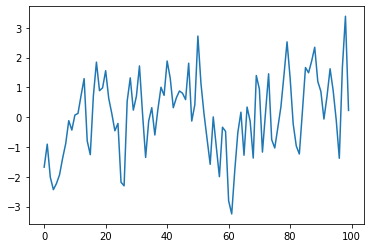

In [15]:
N = 101
e = np.random.normal(0,1,N)
ma1 = np.array([e[i]+0.9*e[i-1] for i in range(1,N)])
plt.plot(ma1)
plt.show()

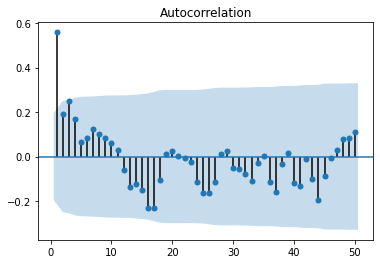

In [16]:
plot_acf(ma1,lags = 50,zero = False)
plt.show()

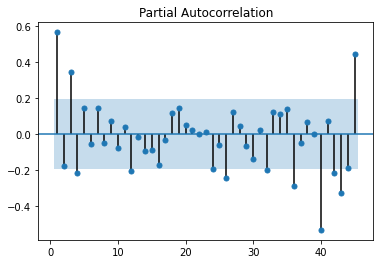

In [18]:
plot_pacf(ma1,lags = 45, zero= False)
plt.show()


## Zadanie - model MA(2)
Wygeneruj 100 elementowy szereg MA(2): $Y_t = \varepsilon_t + 0.9 \cdot \varepsilon_{t-1} + 0.7 * \varepsilon_{t-2}$.

In [38]:
N2 = 102
e2 = np.random.normal(0,1,N2)
ma2=np.array([e2[i]+0.9*e2[i-1]+0.7*e2[i-2] for i in range(2,N2)])
print(ma2)


[ 2.02980091  0.69581919  0.43862601  0.45770486 -1.19988921 -1.27759852
 -1.45340034 -0.4197995  -0.49255727  1.23581786  1.27206061  2.15569405
  2.64474248  4.19030111  5.50542975  2.43319449  1.27572868 -1.1323845
 -2.40586954 -3.74947389 -1.92715246  1.28676571  2.54513685 -0.52996646
 -2.09997298 -1.71509164  0.36861882  1.22174978  0.85858494 -0.88466349
 -1.02052401 -0.67477737  3.07367494  2.49610603  1.63924865 -0.41437758
 -2.38524058 -3.20421459 -3.27365813 -2.56431851 -0.40876832  1.47949247
  3.65821313  3.73692508  0.84312806 -0.85793228 -1.47176459  1.05580548
  0.32668348  1.61353178 -0.42832482  0.53043868 -1.87580542 -1.61192846
  0.38834105  0.46370319 -0.81380689 -2.69884432 -0.6986428  -1.67983483
 -0.87910326  0.83772788  1.93867597  0.99725724 -0.50914268  0.06236922
 -0.18865977 -1.24314382 -1.14189471 -1.1648345  -1.53878751 -1.19455049
 -1.41929113 -0.7574018  -0.03162378  0.67626979  1.42576029  1.60319368
  0.41040544 -1.93676013 -3.60474838 -1.72140877  1.

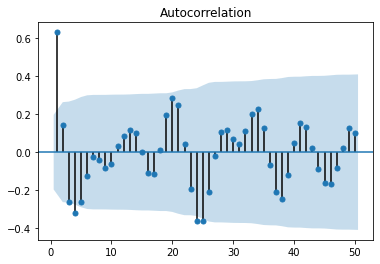

In [39]:
plot_acf(ma2,lags = 50,zero = False)
plt.show()

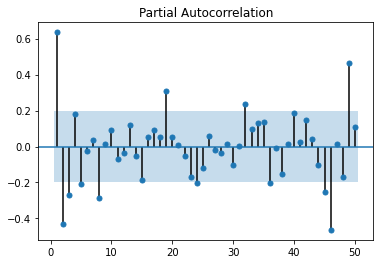

In [40]:
plot_pacf(ma2,lags = 50,zero = False)
plt.show()

## Model autoregresji rzędu $p$ - $\text{AR}(p)$

**Modelem autoregresji rzędu $p$** nazywamy stacjonarny szereg czasowy $Y_t$ spełniający równanie:
$$Y_t = \sum_{i=1}^p \phi_i\cdot Y_{t-i} + \varepsilon_t,$$
gdzie $\phi_1, \phi_2, \ldots, \phi_p$ są współczynnikami modelu oraz $\varepsilon_t$ to biały szum.

## Zadanie - model AR(1) 

Wygeneruj 100 elementowy szereg AR(1): $Y_t = 0.8\cdot Y_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

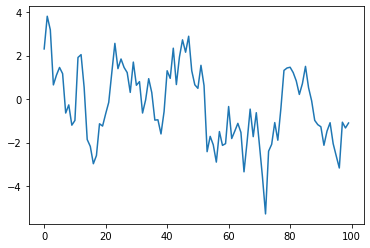

In [46]:
N = 201
e = np.random.normal(0,1,N)
ar1 = np.zeros(N)
for i in range(1,N):
  ar1[i] = 0.8*ar1[i-1]+e[i]
ar1 = ar1[101:]
plt.plot(ar1)
plt.show()


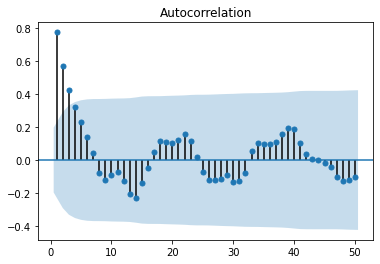

In [47]:
plot_acf(ar1,lags = 50,zero = False)
plt.show()

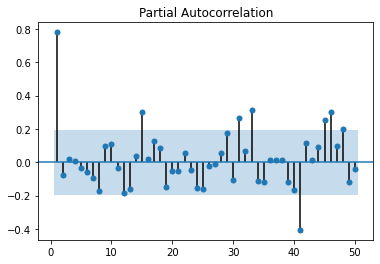

In [48]:
plot_pacf(ar1,lags = 50,zero = False)
plt.show()

## Zadanie - model AR(2) 

Wygeneruj 100 elementowy szereg AR(2): $Y_t = 0.7\cdot Y_{t-2} + 0.8\cdot Y_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

<function matplotlib.pyplot.show>

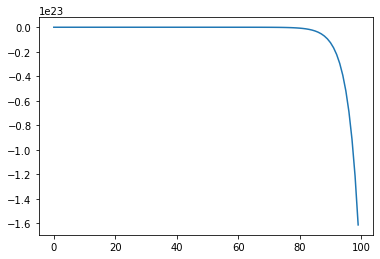

In [56]:
N2 = 201
e2 = np.random.normal(0,1,N2)
ar2 = np.zeros(N2)
for i in range(1,N2):
    ar2[i] = 0.7*ar2[i-2]+ 0.8*ar2[i-1] + e[i]
ar2 = ar2[101:]
plt.plot(ar2)
plt.show


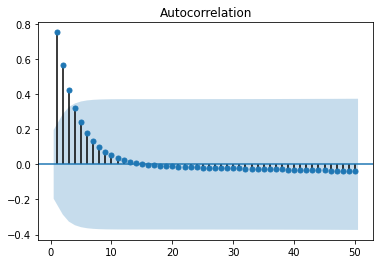

In [57]:
plot_acf(ar2,lags = 50,zero = False)
plt.show()

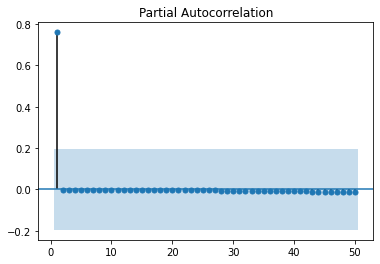

In [59]:
plot_pacf(ar2,lags = 50,zero = False)
plt.show()

## Model autoregresji ruchomej średniej - $\text{ARMA}(p, q)$

**Modelem autoregresji ruchomej średniej** nazywamy stacjonarny szereg czasowy $Y_t$ spełniający równanie:
$$Y_t = \sum_{i=1}^p \phi_i\cdot Y_{t-i} + \sum_{j=1}^q \theta_j \cdot \varepsilon_{t-j} + \varepsilon_t,$$
gdzie $\phi_1, \phi_2, \ldots, \phi_p$ oraz  $\theta_1, \theta_2, \ldots, \theta_{q}$ są współczynnikami modelu oraz $\varepsilon_t$ to biały szum.

## Zadanie - model ARMA(1, 1)
Wygeneruj 100 elementowy szereg ARMA(1, 1): $Y_t = 0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

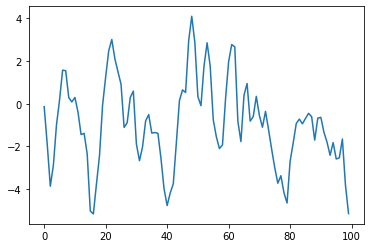

In [65]:
N5 = 201
e = np.random.normal(0,1,N5)
arma = 10*np.ones(N5)
for i in range(1,N5):
    arma[i] = 0.7*arma[i-1]+0.8*e[i-1]+e[i]
arma = arma[101:]
plt.plot(arma)
plt.show()


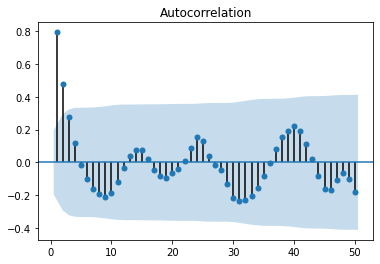

In [67]:
plot_acf(arma,lags = 50,zero = False)
plt.show()

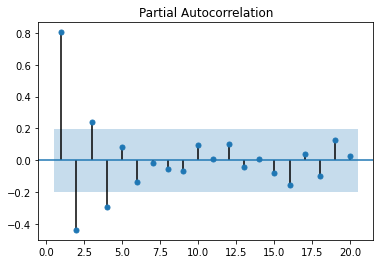

In [69]:
plot_pacf(arma,lags = 20,zero = False)
plt.show()

In [71]:
ar2 = ARIMA(endog=arma, order=(4, 0, 2)) 
ar2 = ar2.fit()

In [72]:
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(4, 2)   Log Likelihood                -137.914
Method:                       css-mle   S.D. of innovations              0.950
Date:                Sun, 19 Jun 2022   AIC                            291.827
Time:                        14:00:10   BIC                            312.669
Sample:                             0   HQIC                           300.262
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9315      0.342     -2.725      0.008      -1.601      -0.261
ar.L1.y        1.5510      0.379      4.093      0.000       0.808       2.294
ar.L2.y       -0.8733      0.426     -2.051      0.043      -1.708      -0.039
ar.L3.y        0.3390      0.334      1.014      0.313      -0.316       0.994
ar.L4.y       -0.1516      0.151     -1.001      0.319      -0.448       0.145
ma.L1.y       -0.1189      0.377     -0.315      0.753      -0.859       0.621
ma.L2.y       -0.4016      0.302     -1.332      0.186      -0.993       0.189
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1580           -0.3680j            1.2151           -0.0490
AR.2            1.1580           +0.3680j            1.2151            0.0490
AR.3           -0.0396           -2.1136j            2.1140           -0.2530
AR.4           -0.0396           +2.1136j            2.1140            0.2530
MA.1            1.4368           +0.0000j            1.4368            0.0000
MA.2           -1.7329           +0.0000j            1.7329            0.5000
-----------------------------------------------------------------------------
"""

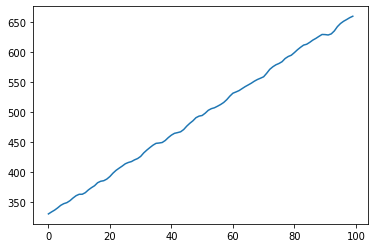

In [74]:
#przykład dodatkowy
N5 = 201
e = np.random.normal(0,1,N5)
arima = 10*np.ones(N5)
for i in range(1,N5):
    arima[i] = i+0.7*arima[i-1]+0.8*e[i-1]+e[i]
arima = arima[101:]
plt.plot(arima)
plt.show()

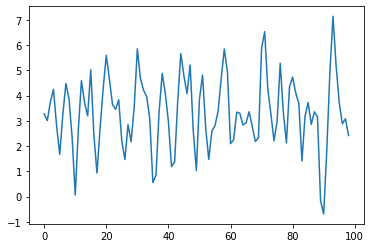

In [82]:
len(arima[:(len(arima)-1)])
arima_diff = arima[1:]-arima[:(len(arima)-1)]
plt.plot(arima_diff)
plt.show()

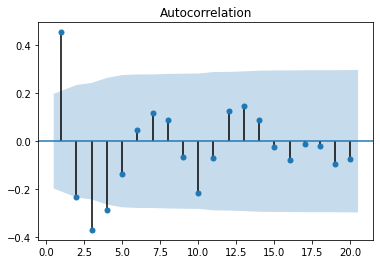

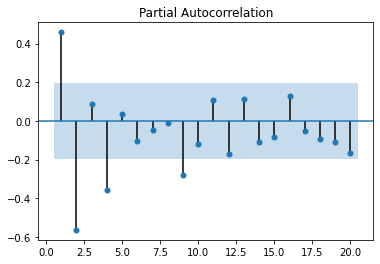

In [83]:
plot_acf(arima_diff,lags = 20,zero = False)
plot_pacf(arima_diff,lags = 20,zero = False)
plt.show()

In [88]:
m1 = ARIMA(endog=arima_diff, order=(4, 0, 2)).fit()
m2 = ARIMA(endog=arima, order=(4, 1, 2)).fit()
print(m1.summary())
print(m2.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   99
Model:                     ARMA(4, 2)   Log Likelihood                -138.608
Method:                       css-mle   S.D. of innovations              0.960
Date:                Sun, 19 Jun 2022   AIC                            293.216
Time:                        14:12:07   BIC                            313.977
Sample:                             0   HQIC                           301.616
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3514      0.017    198.291      0.000       3.318       3.384
ar.L1.y        1.0605      0.208      5.107      0.000       0.654       1.468
ar.L2.y       -0.4801      0.336     -1.431      0.1

## Zadanie - model ARMA(2, 1)
Wygeneruj 100 elementowy szereg ARMA(1, 1): $Y_t = 0.5\cdot Y_{t-2} + 0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.